In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/coins.jpg')

In [ ]:
x = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(cimg, (25, 25), 0)

circles = cv2.HoughCircles(blur,cv2.HOUGH_GRADIENT,1,70,param1=90,param2=40,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,0,255),10)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,255,0),10)

plt.rcParams['figure.figsize'] = (16,10)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Final result")
plt.show()

print("There are : " + str(circles.shape[1]) + " coins")

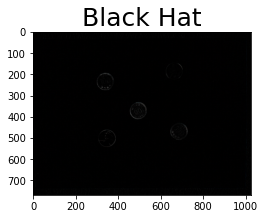

In [10]:
kernel=np.ones((3,3),np.uint8)
blackhat=cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(cv2.cvtColor(blackhat, 0))
plt.title('Black Hat', fontsize=25)
plt.show()

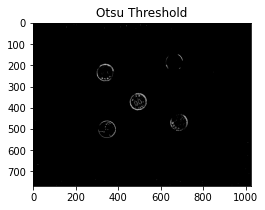

In [11]:

blackhat = cv2.cvtColor(blackhat, cv2.COLOR_RGB2GRAY)

ret,th=cv2.threshold(blackhat,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(cv2.cvtColor(th, 0))
plt.title('Otsu Threshold')
plt.show()

In [12]:
cont_img = th.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

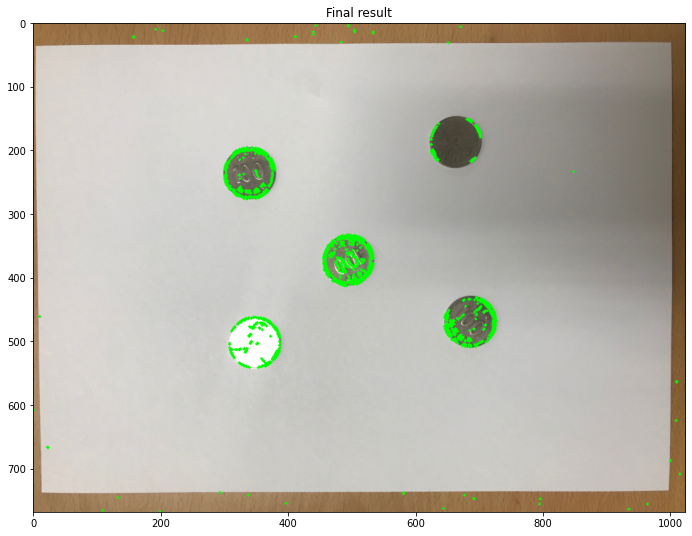

In [13]:
for i in range(len(contours)):
    cv2.drawContours(img, contours[i], -1, (0,255,0), 3)

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Results')
plt.show()